In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\GUVI\PROJECT AMAZON DELIVERY\amazon_delivery.csv")

# Display the first few rows
df.head()


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [2]:
# Check basic info
df.info()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [3]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    # Convert to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine calculation
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of Earth (km)
    return c * r

# If columns are named like 'Store_lat', 'Store_lon', 'Drop_lat', 'Drop_lon'
df['distance_km'] = df.apply(lambda row: haversine(row['Store_Latitude'], row['Store_Longitude'], row['Drop_Latitude'], row['Drop_Longitude']), axis=1)


In [4]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df = df.drop_duplicates()


Number of duplicate rows: 0


In [5]:
# Check missing again
missing = df.isnull().sum()
print(missing)


Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
distance_km         0
dtype: int64


In [6]:
# Fill numerical missing values
numerical_cols = ['distance_km', 'Delivery_Time','Agent_Rating']  # Example numerical columns
for col in numerical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Fill categorical missing values
categorical_cols = ['Weather', 'Traffic']  # Example categorical columns
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])


In [7]:
df.isnull().sum()

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
distance_km        0
dtype: int64

In [8]:
# Lowercase and strip spaces>>standarize categorical value 
for col in ['Weather','Traffic']:
    if col in df.columns:
        df[col] = df[col].str.lower().str.strip()


In [9]:
df["Weather"].value_counts()

Weather
fog           7531
stormy        7374
cloudy        7288
sandstorms    7245
windy         7223
sunny         7078
Name: count, dtype: int64

In [10]:
df["Area"].value_counts()

Area
Metropolitian     32698
Urban              9751
Other              1138
Semi-Urban          152
Name: count, dtype: int64

In [11]:
print(df.shape)


(43739, 17)


In [12]:
df.sample(5)


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,distance_km
3623,gocm083111223,24,4.5,12.934365,77.616155,12.984365,77.666155,2022-03-24,20:15:00,20:30:00,cloudy,jam,scooter,Urban,140,Pet Supplies,7.763181
17764,mgjz680934711,30,4.2,30.332735,78.054222,30.382735,78.104222,2022-02-15,22:20:00,22:30:00,windy,low,motorcycle,Urban,170,Snacks,7.343441
27665,lyng812759942,30,4.3,21.157729,72.768726,21.177729,72.788726,2022-03-11,08:10:00,08:20:00,sandstorms,low,motorcycle,Urban,105,Toys,3.040816
6592,fvsr935047996,37,4.7,21.186884,72.793616,21.226884,72.833616,2022-03-19,16:55:00,17:05:00,fog,medium,motorcycle,Metropolitian,140,Shoes,6.080883
32432,twle045724184,37,4.9,18.530963,73.828972,18.580963,73.878972,2022-03-28,23:15:00,23:30:00,sandstorms,low,motorcycle,Metropolitian,115,Pet Supplies,7.661018


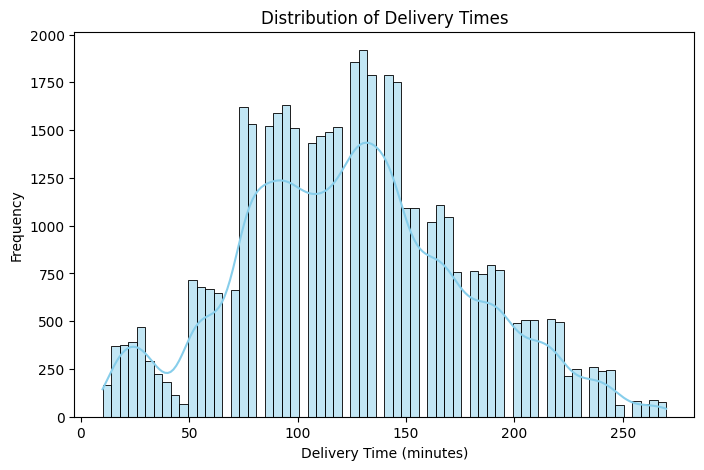

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Delivery_Time'], kde=True, color='skyblue')
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13272\916978400.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Traffic', y='Delivery_Time', palette='coolwarm')


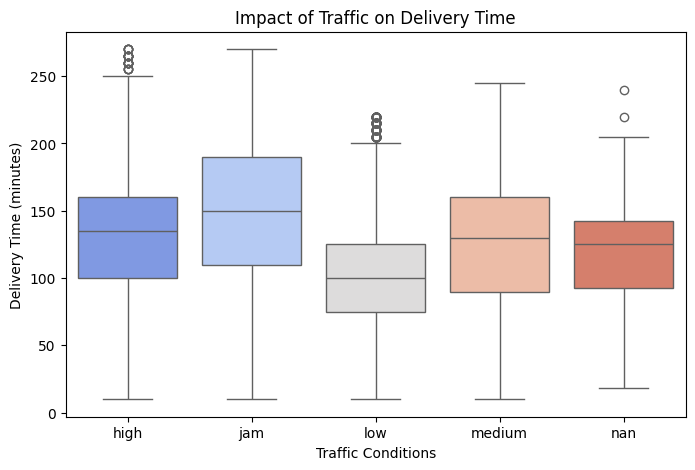

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Traffic', y='Delivery_Time', palette='coolwarm')
plt.title('Impact of Traffic on Delivery Time')
plt.xlabel('Traffic Conditions')
plt.ylabel('Delivery Time (minutes)')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13272\3560113935.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Weather', y='Delivery_Time', palette='viridis')


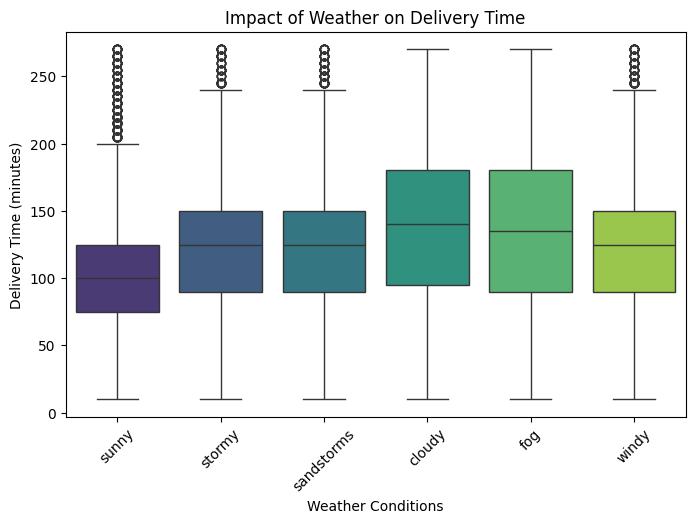

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Weather', y='Delivery_Time', palette='viridis')
plt.title('Impact of Weather on Delivery Time')
plt.xlabel('Weather Conditions')
plt.ylabel('Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.show()


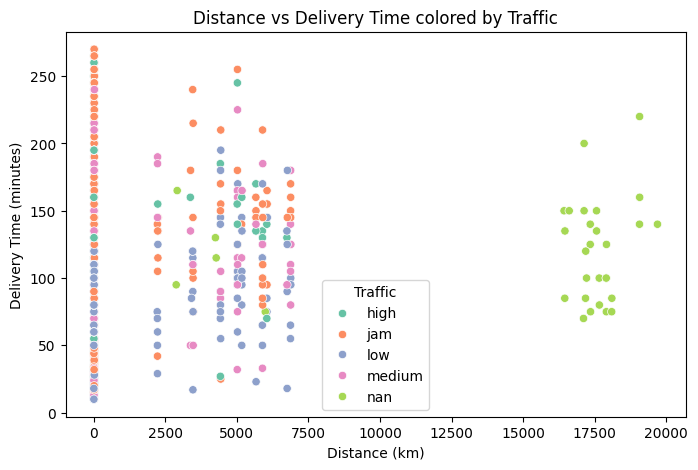

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='distance_km', y='Delivery_Time', hue='Traffic', palette='Set2')
plt.title('Distance vs Delivery Time colored by Traffic')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (minutes)')
plt.show()


In [17]:
import numpy as np

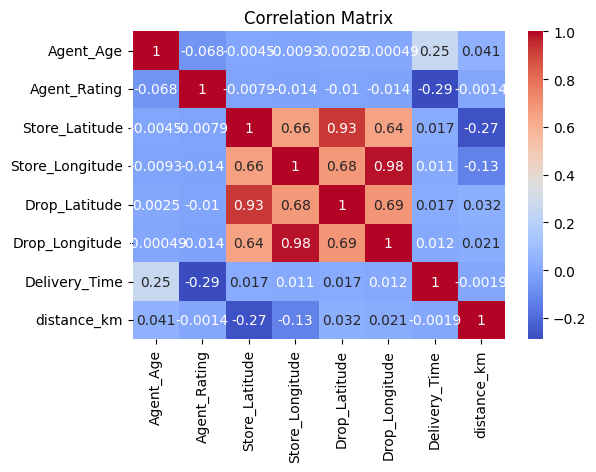

In [18]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [19]:
# First, check if a datetime column exists
print(df.columns)

# Example: Let's say the column is called 'Order_DateTime'
# Convert to datetime format
df['Order_DateTime'] = pd.to_datetime(df['Order_Time'], errors='coerce')


# Extract hour
df['Order_Hour'] = df['Order_DateTime'].dt.hour

# Extract day of week (Monday=0, Sunday=6)
df['Order_DayOfWeek'] = df['Order_DateTime'].dt.dayofweek


Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category', 'distance_km'],
      dtype='object')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13272\1479408069.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_DateTime'] = pd.to_datetime(df['Order_Time'], errors='coerce')


In [20]:
df['Order_Date'] = pd.to_datetime(df['Order_DateTime'])


In [21]:
invalid_dates = df[df['Order_Time'].isna()]
print("Invalid datetime entries:")
invalid_dates


Invalid datetime entries:


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,distance_km,Order_DateTime,Order_Hour,Order_DayOfWeek


In [22]:
df.sample(5)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,distance_km,Order_DateTime,Order_Hour,Order_DayOfWeek
23172,asas104063227,20,4.5,0.000000,0.000000,0.040000,0.040000,2025-05-12 15:00:00,15:00:00,15:10:00,fog,high,motorcycle,Metropolitian,120,Electronics,6.290135,2025-05-12 15:00:00,15.0,0.0
21901,wlds259176633,23,4.6,22.744648,75.894377,22.784648,75.934377,2025-05-12 13:15:00,13:15:00,13:25:00,cloudy,high,scooter,Metropolitian,115,Electronics,6.050103,2025-05-12 13:15:00,13.0,0.0
40000,tosj168716390,24,4.6,22.310237,73.158921,22.330237,73.178921,2025-05-12 09:30:00,09:30:00,09:35:00,fog,low,scooter,Metropolitian,90,Toys,3.029538,2025-05-12 09:30:00,9.0,0.0
409,vpzj106843126,35,4.7,11.010375,76.952950,11.090375,77.032950,2025-05-12 23:15:00,23:15:00,23:20:00,stormy,low,scooter,Metropolitian,90,Home,12.464190,2025-05-12 23:15:00,23.0,0.0
23629,xnul933877168,25,4.8,23.351489,85.324253,23.371489,85.344253,2025-05-12 08:15:00,08:15:00,08:20:00,windy,low,motorcycle,Metropolitian,85,Sports,3.018907,2025-05-12 08:15:00,8.0,0.0


In [23]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply
df['Time_of_Day'] = df['Order_Hour'].apply(time_of_day)


In [24]:
df.sample()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,...,Traffic,Vehicle,Area,Delivery_Time,Category,distance_km,Order_DateTime,Order_Hour,Order_DayOfWeek,Time_of_Day
22766,ixwm687344334,34,4.4,19.178321,72.834715,19.288321,72.944715,2025-05-12 21:10:00,21:10:00,21:20:00,...,jam,motorcycle,Metropolitian,190,Sports,16.822057,2025-05-12 21:10:00,21.0,0.0,Night


In [25]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_cols = ['Traffic','Weather','Time_of_Day','Vehicle','Area','Category']

# Encode
encoder = LabelEncoder()
for col in categorical_cols:
    if col in df.columns:
        df[col] = encoder.fit_transform(df[col])


In [26]:
df.sample()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,...,Traffic,Vehicle,Area,Delivery_Time,Category,distance_km,Order_DateTime,Order_Hour,Order_DayOfWeek,Time_of_Day
42737,myir335042553,34,4.6,11.025083,77.015393,11.065083,77.055393,2025-05-12 14:55:00,14:55:00,15:05:00,...,0,1,0,160,7,6.23215,2025-05-12 14:55:00,14.0,0.0,0


In [27]:
df=df.drop(["Agent_Age","Agent_Rating"],axis=1)

In [28]:
df=df.drop(["Store_Latitude","Store_Longitude","Drop_Latitude","Drop_Longitude"],axis=1)

In [29]:
df=df.drop(["Order_ID"],axis=1)

In [30]:
df=df.drop(["Pickup_Time","Category"],axis=1)


In [31]:
df=df.drop(["Order_Date"],axis=1)

In [32]:
df=df.drop(["Order_Time"],axis=1)

In [33]:
df=df.drop(["Order_DateTime"],axis=1)

In [34]:
df.sample(5)

,Weather,Traffic,Vehicle,Area,Delivery_Time,distance_km,Order_Hour,Order_DayOfWeek,Time_of_Day
30678,4,1,2,3,120,7.862668,20.0,0.0,1
596,0,2,1,3,100,4.469158,23.0,0.0,3
39177,0,2,1,0,100,19.086807,22.0,0.0,3
18683,1,2,1,0,220,12.073552,23.0,0.0,3
23116,0,2,2,0,170,16.787850,22.0,0.0,3


In [41]:
df.isnull().sum()

Weather             0
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
distance_km         0
Order_Hour         91
Order_DayOfWeek    91
Time_of_Day         0
dtype: int64

In [42]:
numerical_cols = ['Order_Hour', 'Order_DayOfWeek']  # Example numerical columns
for col in numerical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

In [43]:
df.isnull().sum()

Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
distance_km        0
Order_Hour         0
Order_DayOfWeek    0
Time_of_Day        0
dtype: int64

In [45]:
# Basic libraries
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# MLflow (for model tracking)
import mlflow
import mlflow.sklearn


In [46]:
# Target: Delivery Time
y = df['Delivery_Time']

# Features: drop unnecessary columns
X = df.drop(['Delivery_Time'],axis=1, errors='ignore')


In [50]:
X

,Weather,Traffic,Vehicle,Area,distance_km,Order_Hour,Order_DayOfWeek,Time_of_Day
0,4,0,1,3,3.025149,11.0,0.0,2
1,3,1,2,0,20.183530,19.0,0.0,1
2,2,2,1,3,1.552758,8.0,0.0,2
3,4,3,1,0,7.790401,18.0,0.0,1
4,0,0,2,0,6.210138,13.0,0.0,0
...,...,...,...,...,...,...,...,...
43734,5,0,1,0,1.489846,11.0,0.0,2
43735,5,1,1,0,11.007735,19.0,0.0,1
43736,0,2,2,0,4.657195,23.0,0.0,3
43737,0,0,1,0,6.232393,13.0,0.0,0


In [37]:
# X = X.dropna()

In [38]:

# y = y.loc[X.index]  # Make sure y matches the filtered X


In [47]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Dictionary to store results
results = {}

# Loop through models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    }
    
    # Print metrics
    print(f"{name} Results:")
    print(f" MAE: {mae:.2f}")
    print(f" RMSE: {rmse:.2f}")
    print(f" R2: {r2:.2f}")
    print("-"*30)


Training Linear Regression...
Linear Regression Results:
 MAE: 37.61
 RMSE: 47.62
 R2: 0.15
------------------------------
Training Random Forest...
Random Forest Results:
 MAE: 34.36
 RMSE: 46.06
 R2: 0.20
------------------------------
Training Gradient Boosting...
Gradient Boosting Results:
 MAE: 30.78
 RMSE: 41.23
 R2: 0.36
------------------------------


In [49]:
import joblib

# After training
joblib.dump(models['Gradient Boosting'], 'gradient_boosting_m.pkl')


['gradient_boosting_m.pkl']